In [ ]:
%%capture
!pip install wldhx.yadisk-direct -qqq
!curl -L $(yadisk-direct https://yadi.sk/d/UJ8DEma9LHRMsg) -o track_1.tar
!tar xvf track_1.tar

In [ ]:
# !rm -rf /content/idao_dataset

In [ ]:
!curl -L $(yadisk-direct https://yadi.sk/d/hu-ozEKEthBAXw) -o track1_predictions_example.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  744k  100  744k    0     0   720k      0  0:00:01  0:00:01 --:--:-- 1883k


In [ ]:
!git clone https://github.com/abdalazizrashid/idao-21-baseline.git

Cloning into 'idao-21-baseline'...
remote: Enumerating objects: 141, done.
remote: Counting objects: 100% (141/141), done.
remote: Compressing objects: 100% (98/98), done.
remote: Total 141 (delta 56), reused 105 (delta 32), pack-reused 0
Receiving objects: 100% (141/141), 37.05 MiB | 21.54 MiB/s, done.
Resolving deltas: 100% (56/56), done.


baseline

In [ ]:
!pip install -r /content/idao-21-baseline/requirements.txt

In [ ]:
!git clone https://github.com/leaderj1001/Attention-Augmented-Conv2d 
!mv /content/Attention-Augmented-Conv2d  /content/idao-21-baseline

Cloning into 'Attention-Augmented-Conv2d'...
remote: Enumerating objects: 171, done.
remote: Total 171 (delta 0), reused 0 (delta 0), pack-reused 171
Receiving objects: 100% (171/171), 42.94 KiB | 4.29 MiB/s, done.
Resolving deltas: 100% (82/82), done.


In [ ]:
import torch
from agm.attention_augmented_conv import AugmentedConv

In [ ]:

# from attention_augmented_conv import AugmentedConv

use_cuda = torch.cuda.is_available()
# device = torch.deivce('cuda' if use_cuda else 'cpu')

tmp = torch.randn((16, 3, 32, 32))#.to(device)
augmented_conv1 = AugmentedConv(in_channels=3, out_channels=20, kernel_size=3, dk=40, dv=4, Nh=4, relative=True, stride=1, shape=32)#.to(device)
conv_out1 = augmented_conv1(tmp)
print(conv_out1.shape)

/content/agm/attention_augmented_conv.py:80: UserWarning: Output 0 of ViewBackward is a view and is being modified inplace. This view is an output of a function that returns multiple views. Inplace operators on such views are being deprecated and will be forbidden starting from version 1.8. Consider using `unsafe_` version of the function that produced this view or don't modify this view inplace. (Triggered internally at  /pytorch/torch/csrc/autograd/variable.cpp:547.)
  q *= dkh ** -0.5


torch.Size([16, 20, 32, 32])


In [ ]:
!mv /content/idao-21-baseline/checkpoints /content/idao-21-baseline/checkpoints_bk2 && python /content/idao-21-baseline/train.py
!python /content/idao-21-baseline/train.py

In [ ]:
!python /content/idao-21-baseline/generate_submission.py

Traceback (most recent call last):
  File "/content/idao-21-baseline/generate_submission.py", line 75, in <module>
    main(cfg=config)
  File "/content/idao-21-baseline/generate_submission.py", line 66, in main
    make_csv(mode, dl, model_path, cfg=cfg)
  File "/content/idao-21-baseline/generate_submission.py", line 28, in make_csv
    model = SimpleConv.load_from_checkpoint(checkpoint_path, mode=mode)
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/core/saving.py", line 134, in load_from_checkpoint
    checkpoint = pl_load(checkpoint_path, map_location=lambda storage, loc: storage)
  File "/usr/local/lib/python3.7/dist-packages/pytorch_lightning/utilities/cloud_io.py", line 31, in load
    with fs.open(path_or_url, "rb") as f:
  File "/usr/local/lib/python3.7/dist-packages/fsspec/spec.py", line 943, in open
    **kwargs,
  File "/usr/local/lib/python3.7/dist-packages/fsspec/implementations/local.py", line 118, in _open
    return LocalFileOpener(path, mode, fs=self,

In [ ]:
!zip -r /content/IDAO_baseline.zip /content/

  adding: content/ (stored 0%)
  adding: content/.config/ (stored 0%)
  adding: content/.config/config_sentinel (stored 0%)
  adding: content/.config/.last_survey_prompt.yaml (stored 0%)
  adding: content/.config/.last_opt_in_prompt.yaml (stored 0%)
  adding: content/.config/configurations/ (stored 0%)
  adding: content/.config/configurations/config_default (deflated 15%)
  adding: content/.config/logs/ (stored 0%)
  adding: content/.config/logs/2021.03.05/ (stored 0%)
  adding: content/.config/logs/2021.03.05/14.36.53.409573.log (deflated 54%)
  adding: content/.config/logs/2021.03.05/14.36.31.463841.log (deflated 87%)
  adding: content/.config/logs/2021.03.05/14.36.37.024558.log (deflated 54%)
  adding: content/.config/logs/2021.03.05/14.35.57.114217.log (deflated 92%)
  adding: content/.config/logs/2021.03.05/14.36.52.882999.log (deflated 54%)
  adding: content/.config/logs/2021.03.05/14.36.17.080333.log (deflated 54%)
  adding: content/.config/.last_update_check.json (deflated 23%)

In [ ]:
data=pd.read_csv('submission.csv')
data.head()

,id,classification_predictions,regression_predictions
0,dcf71a904552d6203b42e259dc5bbe7ba9d7b62f,0,20
1,d4d101b6cf03ff6c4753e6176a0896b057c54512,0,20
2,28855e475ec8db42af50424acae226d6bc4ae65f,0,20
3,0211b30dde13f89412367d23baba30e08ec49db3,0,10
4,aceee68df2dddc92d1a8d3ac1d459561d154d345,1,10


In [ ]:
data.regression_predictions.unique()

array([20, 10, 30])

# Dataset

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch
import matplotlib.pyplot as plt
from os import listdir
from os.path import isfile, join
import random
import os
import cv2
from google.colab.patches import cv2_imshow
from sklearn.model_selection import train_test_split
from PIL import Image
import numpy as np
import cv2
from torch.utils.data import Dataset
from torchvision import datasets, transforms


In [ ]:
class_train_binary = {"['ER', '1']":0,"['ER', '3']":0,"['ER', '6']":0,"['ER', '10']":0,"['ER', '20']":0,"['ER', '30']":0,
               "['NR', '1']":1,"['NR', '3']":1,"['NR', '6']":1,"['NR', '10']":1,"['NR', '20']":1,"['NR', '30']":1}
onlyfiles = [f for f in listdir('/content/idao_dataset/train/ER') if isfile(join('/content/idao_dataset/train/ER', f))]+[f for f in listdir('/content/idao_dataset/train/NR') if isfile(join('/content/idao_dataset/train/NR', f))]

In [ ]:
!mkdir /content/train_dir_1

In [ ]:
data_path = []
y = []
for path in onlyfiles:
  path_split = path.split('_')
  for p in range(len(path_split)):
    if path_split[p] == 'keV':
      # os.replace('/content/idao_dataset/train/'+path_split[p-2]+'/'+path, '/content/train_dir_1/train_'+path_split[p-2]+'_'+path_split[p-1]+'/'+path)
      data_path.append('/content/idao_dataset/train/'+path_split[p-2]+'/'+path)
      y.append(class_train_binary[str([path_split[p-2],path_split[p-1]])])

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(data_path,y,test_size=0.25)

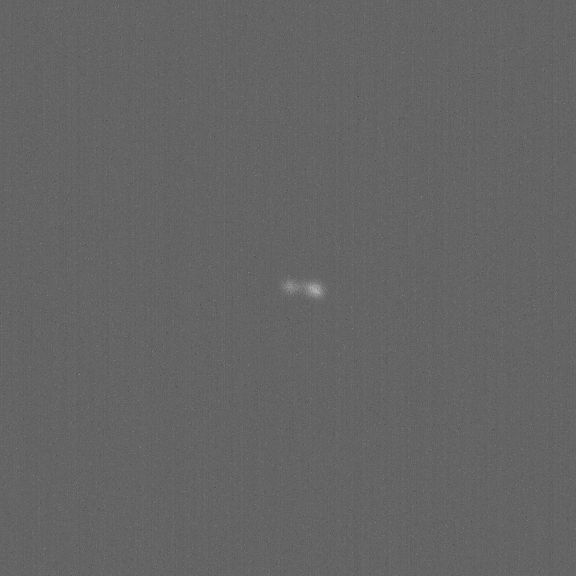

In [ ]:
from PIL import Image
Image.open(X_train[3])

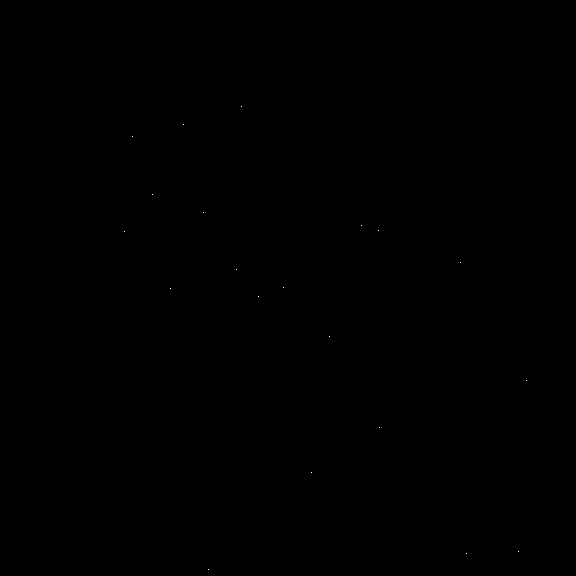

In [ ]:
originalImage = cv2.imread(X_train[121])
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
  
(thresh, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
 
cv2_imshow(blackAndWhiteImage)
  

In [ ]:
transform_all = transforms.Compose([
    # transforms.ColorJitter(hue=0.3,saturation=0.8),                    
    # transforms.Resize((128,128)),
    transforms.RandomRotation(degrees=(-50,50)),
    # transforms.RandomVerticalFlip(),
    transforms.ToTensor(),
])

class PathologyPlantsDataset(Dataset):
    def __init__(self, paths, y,transform=None):
        self.y = y
        self.paths = paths
        self.transform = transform
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):

        if torch.is_tensor(idx):
            idx = idx.tolist()
        
        img_name = self.paths[idx]
        originalImage = cv2.imread(img_name)
        grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
        (_, blackAndWhiteImage) = cv2.threshold(grayImage, 127, 255, cv2.THRESH_BINARY)
        f = np.fft.fft2(blackAndWhiteImage)
        fshift = np.fft.fftshift(f)
        magnitude_spectrum = 20*np.log(np.abs(fshift))
        image = Image.fromarray(np.uint8(magnitude_spectrum)).convert(mode='RGB')
        label = self.y[idx] #- 1
        
        if self.transform:
            image = self.transform(image)
    
        return (image, label)

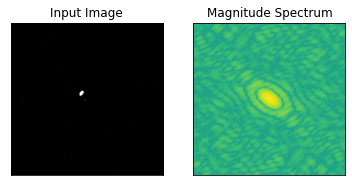

In [ ]:
plt.subplot(121),plt.imshow(blackAndWhiteImage, cmap = 'gray')
plt.title('Input Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(Image.fromarray(np.uint8(magnitude_spectrum)))#, cmap = 'Dark2_r')
plt.title('Magnitude Spectrum'), plt.xticks([]), plt.yticks([])
plt.show()

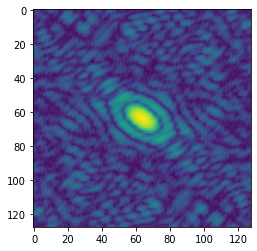

In [ ]:
for i in transform_all(Image.fromarray(np.uint8(magnitude_spectrum))):
  plt.imshow(i)
  plt.show()

In [ ]:

data_tr = PathologyPlantsDataset(X_train,y_train,transform_all)
data_val = PathologyPlantsDataset(X_test,y_test,transform_all)

In [ ]:
data_train = torch.utils.data.DataLoader(data_tr,batch_size=64, shuffle=True)
data_validate = torch.utils.data.DataLoader(data_val,batch_size=64, shuffle=True)

# PyTorch CNN

In [ ]:
learning_rate = 0.01
momentum = 0.5
log_interval = 10

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        self.conv1 = nn.Conv2d(1, 32, kernel_size=5, padding=2)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=5, padding=2)

        self.fc1 = nn.Linear(112896, 1024)
        self.fc2 = nn.Linear(1024, 1)

    def forward(self, x):
        x = F.max_pool2d(F.leaky_relu(self.conv2(F.leaky_relu(self.conv1(x)))), 3)
        x = x.view(x.shape[0], -1)
        # x = x.view(-1, x.shape[0])
        x = F.leaky_relu(self.fc1(x))
        x = F.dropout(x, p=0.4)
        x = self.fc2(x)
        return x#torch.sigmoid(x)

model = Net()

In [ ]:
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCEWithLogitsLoss()#nn.BCELoss()#nn.NLLLoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=100, threshold=0.0001, threshold_mode='rel', cooldown=0, min_lr=0.00000000001, eps=1e-07, verbose=False)

In [ ]:
def accuracy(model, val):
    total = 0
    correct = 0
    for X, y in val:
        X,y = X.to(device),y.to(device)
        with torch.no_grad():
            res = model(X)
        res = res.argmax(dim=1)
        total += res.shape[0]
        correct += (res == y).sum().item()
    return correct / total

In [ ]:
device = torch.device("cuda")
model = model.to(device)

In [ ]:
train_losses = []
for epoch in range(1000):
    model.train()
    for X,y in data_train:
        optimizer.zero_grad()
        X,y = X.to(device),y.to(device)
        output = model(X)
        y = y.unsqueeze(1).float()
        loss = criterion(output, y)
        loss.backward()
        train_losses.append(loss.item())
        optimizer.step()
        scheduler.step(loss)
    model.eval()
    print(accuracy(model, data_validate))
        

#resnet34

In [ ]:

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import numpy as np
import time
import os
import copy

In [ ]:
res_mod = models.resnet34(pretrained=False)

num_ftrs = res_mod.fc.in_features
res_mod.fc = nn.Linear(num_ftrs, 2)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
res_mod = res_mod.to(device)
criterion = nn.CrossEntropyLoss()

optimizer_ft = optim.SGD(res_mod.parameters(), lr=0.001, momentum=0.9)

exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)

In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=10):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        for phase in ['train', 'val']:
            if phase == 'train':
                scheduler.step()
                model.train() 
            else:
                model.eval()

            current_loss = 0.0
            current_corrects = 0

            print('Iterating through data...')

            for inputs, labels in {'train':data_train, 'val':data_validate}[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                current_loss += loss.item() * inputs.size(0)
                current_corrects += torch.sum(preds == labels.data)

            epoch_loss = current_loss / {'train':len(data_train),'val':len(data_validate)}[phase]
            epoch_acc = current_corrects.double() / {'train':len(data_train),'val':len(data_validate)}[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_since = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_since // 60, time_since % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    model.load_state_dict(best_model_wts)
    return model

In [ ]:
train_model(res_mod, criterion, optimizer_ft, exp_lr_scheduler, num_epochs=100)

Epoch 0/10
________________
Iterating through data...

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:41: 

RuntimeWarning: divide by zero encountered in log

train Loss: 22.7318 Acc: 52.1582

Iterating through data...

val Loss: 22.8488 Acc: 51.3585


Epoch 1/10
________________
Iterating through data...

train Loss: 21.7413 Acc: 52.4873

Iterating through data...

val Loss: 22.4245 Acc: 52.5472


# Azure Custom Vision


In [ ]:
pip install azure-cognitiveservices-vision-customvision

In [ ]:
from azure.cognitiveservices.vision.customvision.training import CustomVisionTrainingClient
from azure.cognitiveservices.vision.customvision.prediction import CustomVisionPredictionClient
from azure.cognitiveservices.vision.customvision.training.models import ImageFileCreateBatch, ImageFileCreateEntry, Region
from msrest.authentication import ApiKeyCredentials
import time

In [ ]:
# Replace with valid values
ENDPOINT = ""
training_key = ""

In [ ]:
publish_iteration_name = "classifyModel"

credentials = ApiKeyCredentials(in_headers={"Training-key": training_key})
trainer = CustomVisionTrainingClient(ENDPOINT, credentials)

print ("Creating project...")
project = trainer.create_project("IDAO-reg_clf")

Creating project...


In [ ]:
NR3 = trainer.create_tag(project.id, "NR3")
NR6 = trainer.create_tag(project.id, "NR6")
NR10 = trainer.create_tag(project.id, "NR10")
NR1 = trainer.create_tag(project.id, "NR1")
NR20 = trainer.create_tag(project.id, "NR20")
NR30 = trainer.create_tag(project.id, "NR30")

ER1 = trainer.create_tag(project.id, "ER1")
ER3 = trainer.create_tag(project.id, "ER3")
ER6 = trainer.create_tag(project.id, "ER6")
ER10 = trainer.create_tag(project.id, "ER10")
ER20 = trainer.create_tag(project.id, "ER20")
ER30 = trainer.create_tag(project.id, "ER30")

In [ ]:
cl = {'train_NR_1':NR1,'train_NR_3':NR3,'train_NR_6':NR6,'train_NR_10':NR10,'train_NR_20':NR20,'train_NR_30':NR30,'train_ER_1':ER1,'train_ER_3':ER3,'train_ER_6':ER6,'train_ER_10':ER10,'train_ER_20':ER20,'train_ER_30':ER30}

In [ ]:
from os import listdir
from os.path import isfile, join
# Расскидать по названию в различные папки, как указано ниже
directory = [f for f in listdir('/content/train_dir_1')]
directory

['train_ER_10',
 'train_ER_3',
 'train_ER_20',
 'train_NR_30',
 'train_NR_3',
 'train_ER_30',
 'train_NR_10',
 'train_ER_1',
 'train_NR_20',
 'train_ER_6',
 'train_NR_1',
 'train_NR_6']

In [ ]:
image_list = []
for d in directory:
  onlyfiles = [f for f in listdir('/content/train_dir_1/'+d)]
  for path_id in range(len(onlyfiles)):
    with open('/content/train_dir_1/'+d+'/'+onlyfiles[path_id], "rb") as image_contents:
        image_list.append(ImageFileCreateEntry(name=d+str(path_id), contents=image_contents.read(), tag_ids=[cl[d].id]))

In [ ]:
cl

{'train_ER_1': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f7692f10>,
 'train_ER_10': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f76ffd50>,
 'train_ER_20': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f771f510>,
 'train_ER_3': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f768dd10>,
 'train_ER_30': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f7736b90>,
 'train_ER_6': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f7708c10>,
 'train_NR_1': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f7692550>,
 'train_NR_10': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f74f768d850>,
 'train_NR_20': <azure.cognitiveservices.vision.customvision.training.models._models_py3.Tag at 0x7f

In [ ]:
for i in range(64,len(image_list),64):
  upload_result = trainer.create_images_from_files(project.id, ImageFileCreateBatch(images=image_list[i:i+64]))
  if not upload_result.is_batch_successful:
      print("Image batch upload failed.")
      for image in upload_result.images:
          print("Image status: ", image.status)
      exit(-1)

In [ ]:
# Обучение на https://www.customvision.ai/